## $L_2$-norm loss model specification

Starting from LPCA loss, we modify the factorization objective:
$$
\begin{align*}
L 
&=
\sum_{i=1}^{n}
\sum_{j=1}^{n}
-\log\mathcal{l}
\left(
    \tilde{A}_{i,j}\left[XY^\top\right]_{i,j}
\right)
\\
&\rightarrow
\sum_{i=1}^{n}
\sum_{j=1}^{n}
-\log\mathcal{l}
\left(
    \tilde{A}_{i,j}\left[\beta - ||x_i - y_j||_2\right]
\right)
\end{align*}
$$

### Test reconstruction

In [13]:
import torch
from graph_embeddings.models.L2Model import L2Model

**Load dataset**

In [25]:
adj = torch.load('../data/adj_matrices/Cora.pt')

**Load model and initialize**

In [26]:
X, Y = torch.load('../models/metric-emb/X_Y.pt')
beta = torch.load('../models/metric-emb/beta.pt')

model = L2Model(X.shape[0], Y.shape[1], X.shape[1])

**Test reconstruction**

In [27]:
recon = model.reconstruct((X,Y,beta))
recon_clipped = torch.clip(recon, min=0, max=1)

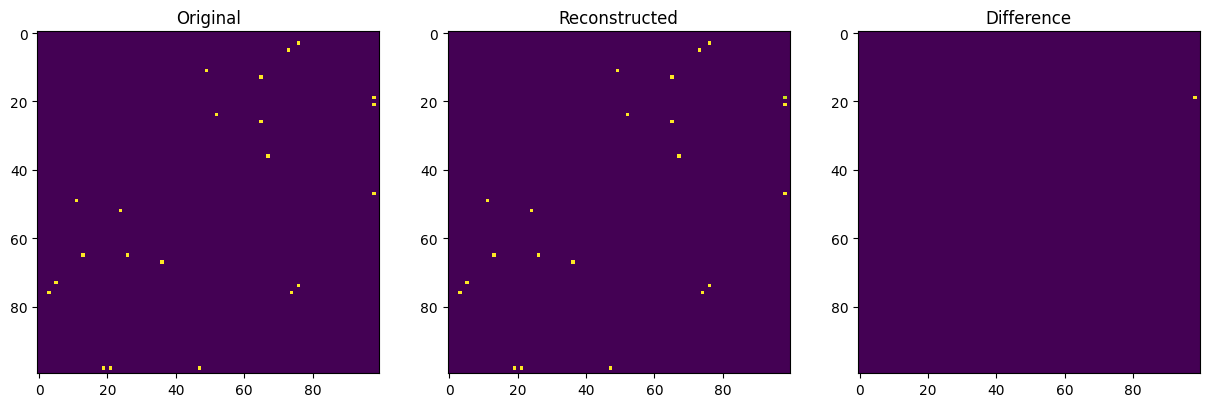

In [34]:
# slice first 100
_x,_y = 500,600
adj_slice = adj[_x:_y, _x:_y]
recon_clipped_slice = recon_clipped[_x:_y, _x:_y]

# plot the results side by side 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(adj_slice.detach().cpu().numpy())
ax[0].set_title('Original')
ax[1].imshow(recon_clipped_slice.detach().cpu().numpy())
ax[1].set_title('Reconstructed')
ax[2].imshow((adj_slice - recon_clipped_slice).detach().cpu().numpy())
ax[2].set_title('Difference')
plt.show()

***Looks very promising, but plots above show one index where there is a difference.***

## SVD

power-metoden til SVD for at kunne arbejde sparse på $2A - 11^\top$